In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("D:\\Python_work\\exercise_data\\train.csv")

In [5]:
# 处理缺失值 - 删除年龄缺失的行
data_clean = data.dropna(subset=['Age']).copy()

# 创建年龄分组
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
data_clean['AgeGroup'] = pd.cut(data_clean['Age'], bins=bins, labels=labels, right=False)

# 按年龄分组计算生还率
age_survival = data_clean.groupby('AgeGroup')['Survived'].agg(['mean', 'count'])
age_survival['SurvivalRate'] = age_survival['mean'] * 100
age_survival.reset_index(inplace=True)


C:\Users\和彦汝\AppData\Local\Temp\ipykernel_28640\2855477940.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = data_clean.groupby('AgeGroup')['Survived'].agg(['mean', 'count'])


In [9]:
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.rcParams['axes.unicode_minus'] = False

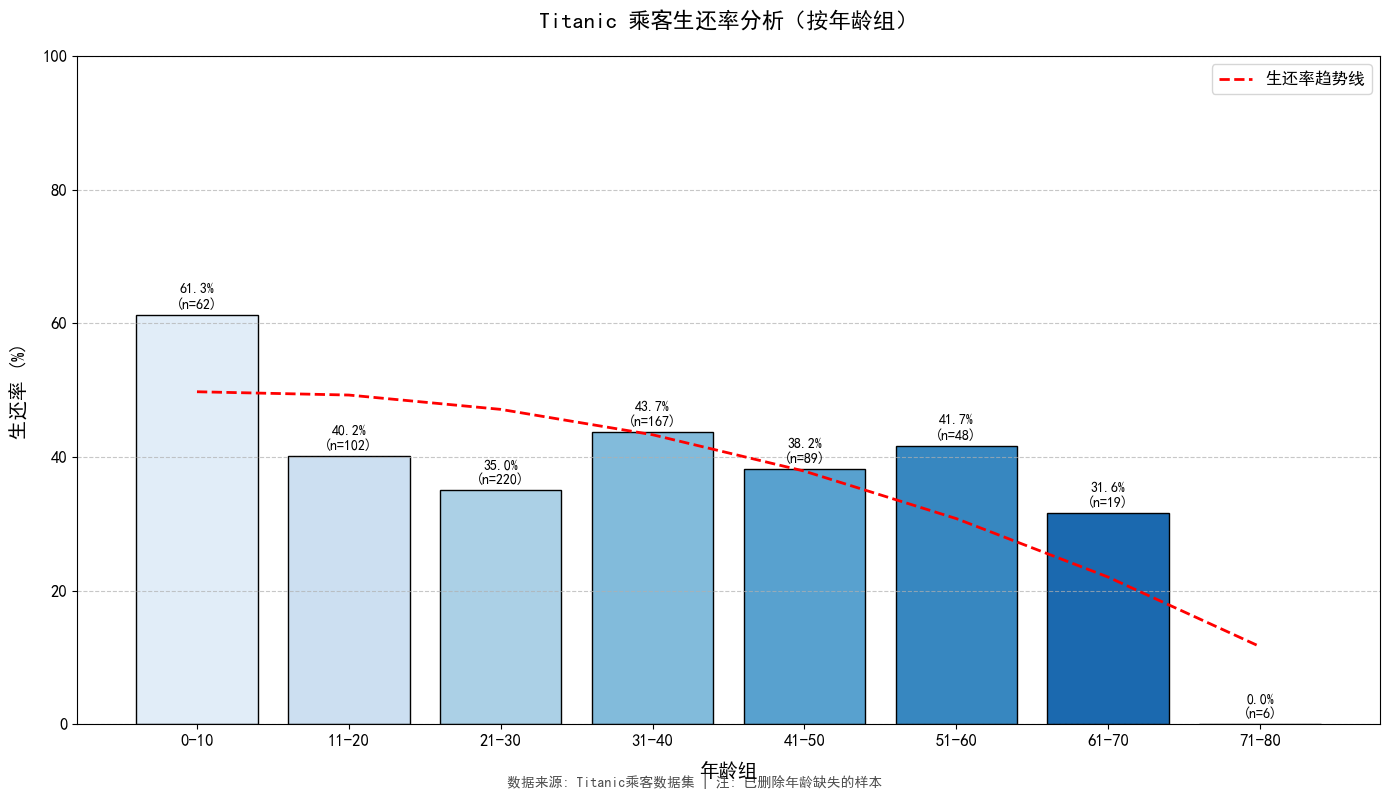

儿童生还率(<16岁): 59.0%
老年人生还率(≥60岁): 26.9%


In [11]:
# 创建直方图
plt.figure(figsize=(14, 8))
bars = plt.bar(
    age_survival['AgeGroup'], 
    age_survival['SurvivalRate'],
    color=sns.color_palette("Blues", len(age_survival)),
    edgecolor='black'
)

# 添加数值标签和样本数量
for bar, rate, count in zip(bars, age_survival['SurvivalRate'], age_survival['count']):
    height = bar.get_height()
    plt.annotate(f'{rate:.1f}%\n(n={count})',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', 
                 va='bottom',
                 fontsize=10)

# 设置图表标题和标签
plt.title('Titanic 乘客生还率分析（按年龄组）', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('年龄组', fontsize=14, labelpad=10)
plt.ylabel('生还率 (%)', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)

# 添加网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 添加趋势线
x = np.arange(len(age_survival))
y = age_survival['SurvivalRate']
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
plt.plot(age_survival['AgeGroup'], p(x), color='red', linestyle='--', linewidth=2, 
         label='生还率趋势线')

# 添加图例
plt.legend(fontsize=12)

# 添加数据来源说明
plt.figtext(0.5, 0.01, '数据来源: Titanic乘客数据集 | 注: 已删除年龄缺失的样本', 
            ha='center', fontsize=10, alpha=0.7)

plt.tight_layout()
#plt.savefig('survival_rate_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

# 计算儿童和老人的生还率
children_rate = data_clean[data_clean['Age'] < 16]['Survived'].mean() * 100
elderly_rate = data_clean[data_clean['Age'] >= 60]['Survived'].mean() * 100

print(f"儿童生还率(<16岁): {children_rate:.1f}%")
print(f"老年人生还率(≥60岁): {elderly_rate:.1f}%")

In [17]:
print(plt.style.available)  # 查看所有支持的样式

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
